## Time series plot of E-OBS and ERA-5 data

This notebook extracts and formats time series data of maximum daily temperature for Warsaw and Madrid, and plots it. 

In [1]:
# imports
import cdo
import xarray as xr
import os
import matplotlib.pyplot as plt

In [2]:
# instanciate cdo object
myCdo = cdo.Cdo()

In [3]:
from local_paths import eobsPath, era5Path

## Selecting the areas of Warsaw and Madrid

Madrid coordinates:
Note: You have now included the south-western outskirts of Madrid
- lat : 40.25, 40.55 - 40.41 degrees north
- lon: -3,50, -3.90 - -3.70 degrees west

Warsaw coordinates:
- lat: 52.05, 52.4 - 52.30  degrees north
- lon: 20.8, 21.3 - 21.01  degrees west

**TODO**: At the moment, the following block is not executable, due to some permission issues that I have not figured out yet:))

In [ ]:
# cut at 01.01.1990

#E-OBS, Madrid
#myCdo.sellonlatbox("-3.90,-3.50,40.55,40.25", input = os.path.join("data/E-OBS", "tx_ens_mean_0.25deg_reg_v24.0e.nc"), output = os.path.join("data/E-OBS", "temp_eobsMadrid.nc"))

# E-OBS, Warsaw
#myCdo.sellonlatbox("20.8,21.3,52.4,52.05", input = os.path.join("data/E-OBS", "tx_ens_mean_0.25deg_reg_v24.0e.nc"), output = os.path.join("data/E-OBS", "temp_eobsWarsaw.nc"))

#ERA-5, Madrid
#myCdo.sellonlatbox("-3.90,-3.50,40.55,40.25", input = os.path.join("data/ERA-5", "maxtemp2m_ERA5_1979-2020.nc"), output = os.path.join("data/ERA-5", "temp_era5Madrid.nc"))

#ERA-5, Warsaw
#myCdo.sellonlatbox("20.8,21.3,52.4,52.05", input = os.path.join("data/ERA-5", "maxtemp2m_ERA5_1979-2020.nc"), output = os.path.join("data/ERA-5", "temp_era5Warsaw.nc"))

# Remove observations before 01-01-1990:

#E-OBS, Madrid
#myCdo.seldate("1990-01-01,2021-06-30", input = eobsPath( "temp_eobsMadrid.nc"), output = eobsPath("temp_eobsFrom1990Madrid.nc"))

#os.system("rm {}".format(eobsPath("temp_eobsMadrid.nc"))

#E-OBS, Warsaw
#myCdo.seldate("1990-01-01,2021-06-30", input = eobsPath( "temp_eobsWarsaw.nc"), output = eobsPath("temp_eobsFrom1990Warsaw.nc"))

#os.system("rm {}".format(eobsPath("temp_eobsWarsaw.nc"))
          
#ERA-5, Madrid
#myCdo.seldate("1990-01-01T11:30:00,2020-05-15T10:30:00", input = era5Path( "temp_era5Madrid.nc"), output = era5Path("temp_era5From1990Madrid.nc"))

#os.system("rm {}".format(era5Path("temp_era5Madrid.nc"))

#ERA-5, Warsaw
#myCdo.seldate("1990-01-01T11:30:00,2020-05-15T10:30:00", input = era5Path( "temp_era5Warsaw.nc"), output = era5Path("temp_era5From1990Warsaw.nc"))

#os.system("rm {}".format(era5Path("temp_era5Warsaw.nc"))

# mean value over selected fields - check if this is correct!

#E-OBS Madrid
#myCdo.fldmean(input = eobsPath("temp_eobsFrom1990Madrid.nc"), output = eobsPath("eobsProcessedMadrid.nc"))

#os.system("rm {}".format(eobsPat("temp_eobsFrom1990Madrid.nc"))

#E-OBS Warsaw
#myCdo.fldmean(input = eobsPath("temp_eobsFrom1990Warsaw.nc"), output = eobsPath("eobsProcessedWarsaw.nc"))

#os.system("rm {}".format(eobsPath("temp_eobsFrom1990Warsaw.nc"))

#ERA-5 Madrid
#myCdo.fldmean(input = era5Path("temp_era5From1990Madrid.nc"), output = era5Path("temp_era5FieldmeanMadrid.nc"))

#os.system("rm {}".format(era5Path("temp_era5From1990Madrid.nc"))

#ERA-5 Warsaw
#myCdo.fldmean(input = era5Path("temp_era5From1990Warsaw.nc"), output = era5Path("temp_era5FieldmeanWarsaw.nc"))

#os.system("rm {}".format(era5Path("temp_era5From1990Warsaw.nc"))


###   ----    ERA-5 to Celcius   ----

# ERA-5 Madrid
#myCdo.setattribute('tasmax@units="Celcius"', input = '-addc,-273.15 {}'.format(era5Path("temp_era5FieldmeanMadrid.nc")), output = era5Path("era5ProcessedMadrid.nc"))

#os.system("rm {}".format(era5Path("temp_era5FieldmeanMadrid.nc")

# ERA-5 Warsaw
#myCdo.setattribute('tasmax@units="Celcius"', input = '-addc,-273.15 {}'.format(era5Path("temp_era5FieldmeanWarsaw.nc")), output = era5Path("era5ProcessedWarsaw.nc"))

#os.system("rm {}".format(era5Path("temp_era5FieldmeanWarsaw.nc"))

We load the above netcdf-files as ``xarray`` datasets. Since we have averaged over the area, we extract a time series by selecting the first (and only) longitude and latitude.

In [4]:
###   ----   Plot Processed Together   ----

# load datasets
ds_eobs_madrid = xr.open_dataset(eobsPath("eobsProcessedMadrid.nc")).isel(lon=0, lat=0)
ds_eobs_warsaw = xr.open_dataset(eobsPath("eobsProcessedWarsaw.nc")).isel(lon=0, lat=0)
ds_era5_madrid = xr.open_dataset(era5Path("era5ProcessedMadrid.nc")).isel(lon=0, lat=0)
ds_era5_warsaw = xr.open_dataset(era5Path("era5ProcessedWarsaw.nc")).isel(lon=0, lat=0)

The data is plotted as time series

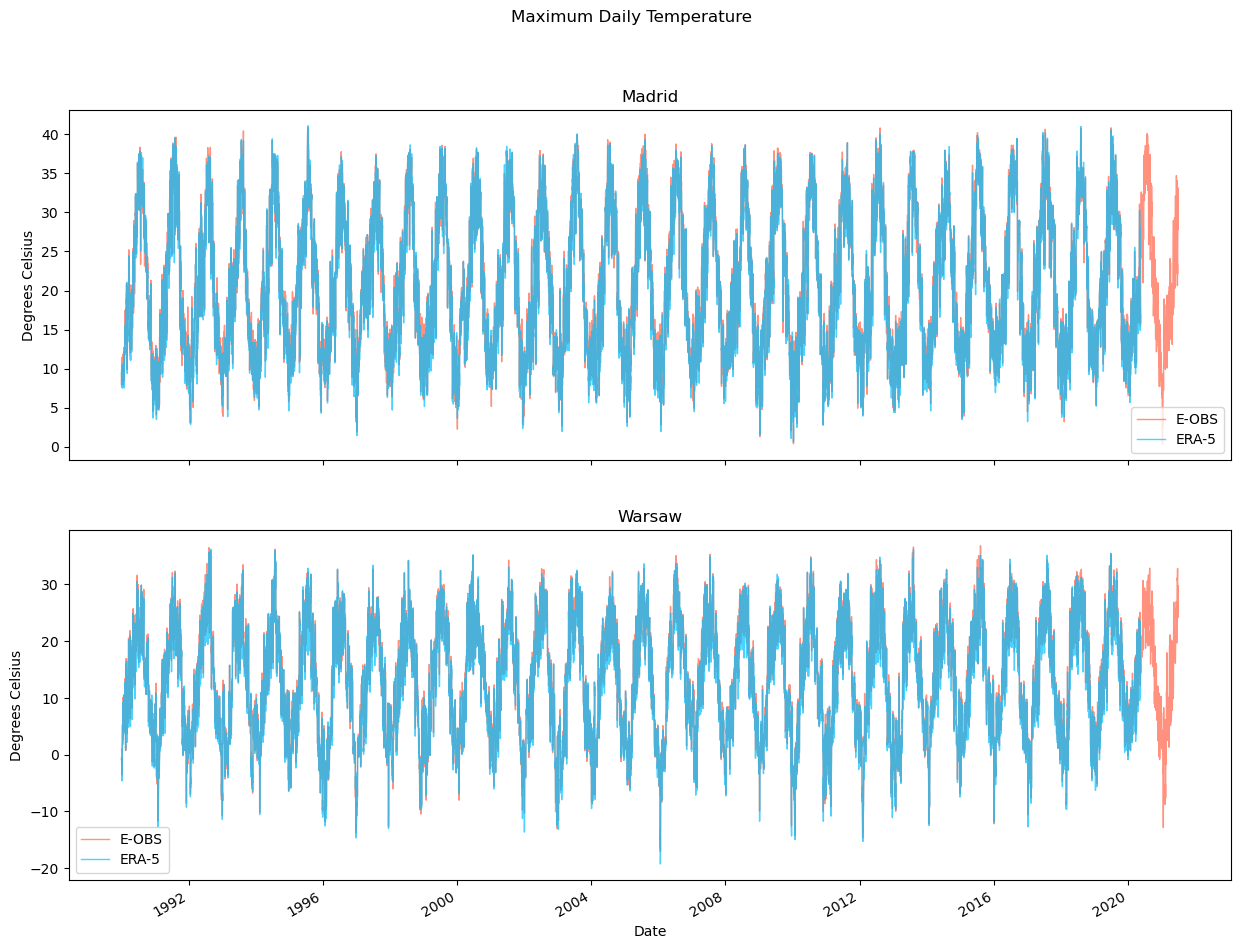

In [5]:
# Madrid

fig, (ax_madrid, ax_warsaw) = plt.subplots(nrows=2, ncols = 1, figsize=(15,10), sharex = True)

ds_eobs_madrid["tx"].plot.line(color="tomato", ax = ax_madrid, linewidth = 1, label = "E-OBS", alpha = 0.7)
ds_era5_madrid["tasmax"].plot.line(color="deepskyblue", ax = ax_madrid, linewidth = 1, label = "ERA-5", alpha = 0.7)

ax_madrid.set_title("Madrid")
ax_madrid.set_ylabel("Degrees Celsius")
ax_madrid.set_xlabel(" ")

ax_madrid.legend()

ds_eobs_warsaw["tx"].plot.line(color="tomato", ax = ax_warsaw, linewidth = 1, label = "E-OBS", alpha = 0.7)
ds_era5_warsaw["tasmax"].plot.line(color = "deepskyblue", ax = ax_warsaw, linewidth = 1, label = "ERA-5", alpha = 0.7)

ax_warsaw.set_title("Warsaw")
ax_warsaw.set_ylabel("Degrees Celsius")
ax_warsaw.set_xlabel("Date")

ax_warsaw.legend()

fig.suptitle("Maximum Daily Temperature")

plt.show()